In [129]:
#***********************************
# Name: Jonah Zembower
# Date: February 8, 2025
# Project: Harvard Research Study on Postural Stability During Heart Catheterization Surgeries
#***********************************

# Importing Libraries and Data

#### Importing Libraries:

In [130]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Importing Data:

In [131]:
# File paths for all pertinent CSVs
file_paths = {
    "Time_00" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_00.csv",
    "Time_01" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_01.csv",
    "Time_02" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_02.csv",
    "Time_03" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_03.csv",
    "Time_04" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_04.csv",
    "Time_05" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_05.csv",
    "Time_06" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_06.csv",
    "Time_07" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_07.csv",
    "Time_08" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_08.csv",
    "Time_09" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_09.csv",
    "Time_10" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_10.csv",
    "Mean" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Mean.csv",
    "Peak" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Peak.csv",
    "Variability" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Variability.csv",
}

# Read each CSV into a DataFrame
csv_data = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [132]:
# Load in the data
survey_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\survey.csv')

# File paths for all pertinent CSVs
file_paths_surveys = {
    "case_with_dummy": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\survey.csv",
    "case_data" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\CASEDATA_RAMPART_WITH LABELS.csv",
    "survey_data": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\BASELINESURVEY_RAMPART_WITH LABELS.csv",
    "discomfort_data": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\DISCOMFORT SURVEY.csv"
}

# Read each CSV into a DataFrame
csv_data_surveys = {name: pd.read_csv(path) for name, path in file_paths_surveys.items()}

#### Indexes:

In [133]:
# Set the index for the lead subjects
subject_ids_lead = [
 '1_001', '2_001', '4_001', '2_002', '3_002', 
    '1_003', '2_003', '4_003',             
    '1_004', '3_005', '5_005', '1_006',
    '2_006', '1_007', '2_007', '2_008', '3_008',
    '2_019', '3_019', '1_020','2_020', '1_021','2_021',
    '1_022', '4_022', '1_023',
    '2_023', '1_024','2_024', '1_026', '2_026','1_027','2_027',
    '1_028', '2_028', '1_029', '2_029',
    '2_030', '3_030', '2_031'
]
# Set the index for the rampart subjects
subject_ids_rampart = [
    '6_001', '1_002',
    '4_002', '3_004', '4_004', '1_005', '4_005',
    '3_006', '4_006', '3_007', '4_007', '1_008',
    '4_008', '1_019', '4_019', '2_022', '3_022', '4_023',
    '1_030', '1_031'
]
# Index for each CSV file:
index = [
    '1_001','2_001','4_001','6_001', '1_002', '2_002', '3_002', '4_002',
    '1_003','2_003','4_003','1_004','3_004','4_004',
    '1_005','3_005','4_005','5_005','1_006', 
    '2_006', '3_006', '4_006', '1_007', '2_007',
      '3_007', '4_007', '1_008', '2_008', '3_008', '4_008',
      '1_019', '2_019', '3_019', '4_019','1_020','2_020',
       '1_021','2_021','1_022','2_022','3_022','4_022',
        '1_023','2_023','4_023','1_024','2_024','1_026','2_026',
         '1_027','2_027','1_028','2_028','1_029','2_029',
         '1_030','2_030','3_030',  '1_031', '2_031'
]
# The column headers for the CSV files
column_headers = [
    'CERVICAL PS LT [%]', 'CERVICAL PS RT [%]','UPPER TRAP. LT [%]','UPPER TRAP. RT [%]',
    'LUMBAR ES LT [%]','LUMBAR ES RT [%]','MIDDLE TRAP. LT [%]','MIDDLE TRAP. RT [%]'
]

# Load both columns together
case_survey_columns = ['Participant ID', 'Age', 'Race ', 'Ethnicity ', 'Gender',
       'Role in cath lab',
       'How many years has the participant worked in the cardiac catheterization laboratory?',
       'Participant Height (in)', 'Participant Weight (lbs)', 'Do you exercise...',
       'Cardio', 'Upper Body Strength Training',
       'Lower body strength training', 'Abdominal strength training', 'Yoga',
       'Stretching', 'Pilates', 'Other Exercise',
       'Do you have a history of orthopedic injury?', 'Neck Injury',
       'Back Injury', 'Shoulder Injury', 'Leg Injury', 'Arm Injury',
       'Other Injury', 'Have you ever had surgery for orthopedic injury?',
       'Do you have any chronic pain syndromes?', 'Neck Pain', 'Back Pain',
       'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain',
       'Date of Case', 'Case Number for the day',
       'Case being done...', 'Participant wearing...',
       'Is participant a technologist?', 'Is the tech...',
       'How many hours of sleep did participant have the night before',
       'Right Radial', 'Left Radial', 'Right Femoral', 'Left Femoral',
       'Right Jugular', 'Left Jugular', 'Right Brachial Vein',
       'Left Brachial Vein', 'Type of Case',
       'Total case length in minutes (first lidocaine injection - sheath removal)',
       'Total radiation (mGy) from procedure log',
       'Participant radiation (mrem)', 'Control Radiation (mrem)',
       'Total contrast (mL)'
]

# Analysis Focus:

1. Assessing various predictor factors related to different features of the EMG data.
2. We also are looking at predictiveness of the mean EMG data based on these different factors.   
3. There are multiple regression, logistic regression, and PCA Analysis techniques we can perform on the data.

# Begin Analysis:

Subject 2_008 and 2_022 and 1_004 and 2_027 were not accurate. So, I removed those subject cases.

Now implement the merged files that I got from other Jupyter Notebooks:

In [134]:
file_paths_merged = {
    "Mean" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Mean_EMG_Data.csv",
    "Peak" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Peak_EMG_Data.csv",
    "Variability" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Merged EMG\\Merged_Variability_EMG_Data.csv"
}

# Read each CSV into a DataFrame
csv_data_merged = {name: pd.read_csv(path) for name, path in file_paths_merged.items()}

In [135]:
csv_data_merged["Mean"].columns

Index(['Participant ID', 'Age', 'Race ', 'Ethnicity ', 'Gender',
       'Role in cath lab',
       'How many years has the participant worked in the cardiac catheterization laboratory?',
       'Participant Height (in)', 'Participant Weight (lbs)',
       'Weight of Lead (lbs)', 'Is the lead...', 'Do you exercise...',
       'Cardio', 'Upper Body Strength Training',
       'Lower body strength training', 'Abdominal strength training', 'Yoga',
       'Stretching', 'Pilates', 'Other Exercise',
       'Do you have a history of orthopedic injury?', 'Neck Injury',
       'Back Injury', 'Shoulder Injury', 'Leg Injury', 'Arm Injury',
       'Other Injury', 'Have you ever had surgery for orthopedic injury?',
       'Do you have any chronic pain syndromes?', 'Neck Pain', 'Back Pain',
       'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain', 'Date of Case',
       'Case Number for the day', 'Case being done...',
       'Participant wearing...', 'Is participant a technologist?',
       'Is th

# Multiple Linear Regression Model:

Make these variables into dummy variables that allow for prediction assessment. 

In [136]:
# Convert the Race column into dummy variables
combined_mean = pd.get_dummies(csv_data_merged["Mean"], columns=['Race ','Ethnicity ','Gender','Role in cath lab','Do you exercise...','Type of Case','Case being done...','Participant wearing...','Is participant a technologist?'])

# Display the first few rows of the updated DataFrame
combined_mean.head()

,Participant ID,Age,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Weight of Lead (lbs),Is the lead...,Cardio,Upper Body Strength Training,Lower body strength training,...,Type of Case_Coronary Arteriogram w/ no intervention,Type of Case_Non-Complex PCI,Type of Case_Other,Type of Case_Right heart catheterization,Type of Case_TAVR,Case being done..._With Rampart shield,Case being done..._Without Rampart shield,Participant wearing..._lead,Participant wearing..._no lead,Is participant a technologist?_No
0,1_001,34,2.0,65,168,NaN,two piece,Checked,Checked,Checked,...,True,False,False,False,False,False,True,True,False,True
1,2_001,34,2.0,65,168,NaN,two piece,Checked,Checked,Checked,...,True,False,False,False,False,False,True,True,False,True
2,4_001,34,2.0,65,168,NaN,two piece,Checked,Checked,Checked,...,True,False,False,False,False,True,False,True,False,True
3,6_001,34,2.0,65,168,NaN,two piece,Checked,Checked,Checked,...,False,False,False,False,False,True,False,False,True,True
4,1_002,34,2.0,69,145,NaN,two piece,Checked,Checked,Checked,...,False,False,False,False,True,True,False,False,True,True


In [137]:
# Replace 'Checked' with 1 and 'Unchecked' with 0
combined_mean.replace({'Checked': 1, 'Unchecked': 0}, inplace=True)

# Replace 'True' with 1 and 'False' with 0
combined_mean.replace({True: 1, False: 0}, inplace=True)

# Replace 'Yes' with 1 and 'No' with 0
combined_mean.replace({'Yes': 1, 'No': 0}, inplace=True)

# Display the first few rows of the updated DataFrame
combined_mean.head()

C:\Users\jrzem\AppData\Local\Temp\ipykernel_1556\1513389137.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_mean.replace({'Checked': 1, 'Unchecked': 0}, inplace=True)
C:\Users\jrzem\AppData\Local\Temp\ipykernel_1556\1513389137.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_mean.replace({True: 1, False: 0}, inplace=True)
C:\Users\jrzem\AppData\Local\Temp\ipykernel_1556\1513389137.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

,Participant ID,Age,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Weight of Lead (lbs),Is the lead...,Cardio,Upper Body Strength Training,Lower body strength training,...,Type of Case_Coronary Arteriogram w/ no intervention,Type of Case_Non-Complex PCI,Type of Case_Other,Type of Case_Right heart catheterization,Type of Case_TAVR,Case being done..._With Rampart shield,Case being done..._Without Rampart shield,Participant wearing..._lead,Participant wearing..._no lead,Is participant a technologist?_No
0,1_001,34,2.0,65,168,NaN,two piece,1,1,1,...,1,0,0,0,0,0,1,1,0,1
1,2_001,34,2.0,65,168,NaN,two piece,1,1,1,...,1,0,0,0,0,0,1,1,0,1
2,4_001,34,2.0,65,168,NaN,two piece,1,1,1,...,1,0,0,0,0,1,0,1,0,1
3,6_001,34,2.0,65,168,NaN,two piece,1,1,1,...,0,0,0,0,0,1,0,0,1,1
4,1_002,34,2.0,69,145,NaN,two piece,1,1,1,...,0,0,0,0,1,1,0,0,1,1


In [138]:
combined_mean.columns

Index(['Participant ID', 'Age',
       'How many years has the participant worked in the cardiac catheterization laboratory?',
       'Participant Height (in)', 'Participant Weight (lbs)',
       'Weight of Lead (lbs)', 'Is the lead...', 'Cardio',
       'Upper Body Strength Training', 'Lower body strength training',
       'Abdominal strength training', 'Yoga', 'Stretching', 'Pilates',
       'Other Exercise', 'Do you have a history of orthopedic injury?',
       'Neck Injury', 'Back Injury', 'Shoulder Injury', 'Leg Injury',
       'Arm Injury', 'Other Injury',
       'Have you ever had surgery for orthopedic injury?',
       'Do you have any chronic pain syndromes?', 'Neck Pain', 'Back Pain',
       'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain', 'Date of Case',
       'Case Number for the day', 'Is the tech...',
       'How many hours of sleep did participant have the night before',
       'Right Radial', 'Left Radial', 'Right Femoral', 'Left Femoral',
       'Right Jugular',

In [139]:
# Convert the DataFrame to a NumPy array
input_data_array = np.asarray(combined_mean)

# Display the shape and first few rows of the array
print("Shape of the array:", input_data_array.shape)
print("First few rows of the array:\n", input_data_array[:5])

Shape of the array: (56, 91)
First few rows of the array:
 [['1_001' 34 2.0 65 168 nan 'two piece' 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 1 1 0 0 0 '6/6/2024' 'First' nan 3.0 0 1 0 0 0 0 0 0 36 456.0 0.6
  61.9 70.0 1 'none' 'ROM data taken from this case' 'Complete' 36.9862
  29.759 6.3704 7.03646 19.9996 16.7715 6.46859 8.66191 0 1 0 0 0 0 0 0 1
  1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1]
 ['2_001' 34 2.0 65 168 nan 'two piece' 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 1 1 0 0 0 '6/6/2024' 'Second' nan 3.0 1 0 0 0 0 0 0 0 44 331.0 0.0
  18.3 90.0 1 nan nan 'Complete' 30.5911 28.2065 6.07497 5.03499 19.1562
  16.6785 8.0004 6.17568 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 0 1 1 0 1]
 ['4_001' 34 2.0 65 168 nan 'two piece' 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 1 1 0 0 0 '6/10/2024' 'First' nan 6.0 0 1 0 0 0 0 0 0 52 798.6 nan
  61.0 75.0 1
  'participant wearing radiation sensor under lead - no data gathered'
  nan 'Complete' 40.4365 41.06 17.2245 16.858 19.3839 24.5018 

In [140]:
# Filter out columns with non-integer or non-float values
predictors_filtered = combined_mean.select_dtypes(include=['int64', 'float64']).columns

# Update the predictors list
predictors = [predictors_filtered]

# Display the updated predictors
predictors

[Index(['Age',
        'How many years has the participant worked in the cardiac catheterization laboratory?',
        'Participant Height (in)', 'Participant Weight (lbs)',
        'Weight of Lead (lbs)', 'Cardio', 'Upper Body Strength Training',
        'Lower body strength training', 'Abdominal strength training', 'Yoga',
        'Stretching', 'Pilates', 'Other Exercise',
        'Do you have a history of orthopedic injury?', 'Neck Injury',
        'Back Injury', 'Shoulder Injury', 'Leg Injury', 'Arm Injury',
        'Other Injury', 'Have you ever had surgery for orthopedic injury?',
        'Do you have any chronic pain syndromes?', 'Neck Pain', 'Back Pain',
        'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain', 'Is the tech...',
        'How many hours of sleep did participant have the night before',
        'Right Radial', 'Left Radial', 'Right Femoral', 'Left Femoral',
        'Right Jugular', 'Left Jugular', 'Right Brachial Vein',
        'Left Brachial Vein',
        '

In [141]:
predictors_filtered = predictors_filtered.drop('Weight of Lead (lbs)')
predictors_filtered = predictors_filtered.drop('Is participant a technologist?_No')
predictors_filtered = predictors_filtered.drop('Is the tech...')

In [142]:
# Extract the column names from the Index object
predictor_columns = predictors_filtered.tolist()

# Filter the combined_mean DataFrame to include only the predictor columns
combined_mean_cleaned = combined_mean[predictor_columns]

# Save the filtered DataFrame to a CSV file
combined_mean_cleaned.to_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\combined_mean_cleaned.csv', index=False)

In [143]:
# Load in the mean data
combined_mean_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\combined_mean_cleaned.csv')

#### Initial Correlations:

In [144]:
# Calculate the correlation matrix
correlation_matrix = combined_mean_data.corr()

# Display the correlation matrix
correlation_matrix

,Age,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Cardio,Upper Body Strength Training,Lower body strength training,Abdominal strength training,Yoga,Stretching,...,Type of Case_Complex PCI,Type of Case_Coronary Arteriogram w/ no intervention,Type of Case_Non-Complex PCI,Type of Case_Other,Type of Case_Right heart catheterization,Type of Case_TAVR,Case being done..._With Rampart shield,Case being done..._Without Rampart shield,Participant wearing..._lead,Participant wearing..._no lead
Age,1.000000,0.859039,-0.003014,-0.056718,0.053975,-0.076375,0.028498,-0.159906,4.550573e-01,-0.150998,...,-0.155926,0.443142,0.062294,0.004279,-0.130510,-0.239887,-0.217133,0.217133,0.161578,-0.161578
How many years has the participant worked in the cardiac catheterization laboratory?,0.859039,1.000000,0.077413,-0.242409,0.138732,-0.156207,-0.067571,-0.165934,4.490175e-01,-0.321119,...,-0.203916,0.423647,0.060752,-0.040026,-0.059457,-0.222801,-0.034426,0.034426,-0.005214,0.005214
Participant Height (in),-0.003014,0.077413,1.000000,0.402717,-0.625414,0.357168,0.356809,0.121662,-1.897999e-01,0.170337,...,0.035900,-0.071956,-0.128725,0.012807,0.201548,0.323099,-0.101969,0.101969,0.048079,-0.048079
Participant Weight (lbs),-0.056718,-0.242409,0.402717,1.000000,-0.440908,0.177931,0.180928,-0.198588,-2.199716e-01,-0.099906,...,-0.140569,0.087694,-0.098668,0.011824,0.217310,-0.155198,-0.084473,0.084473,0.128751,-0.128751
Cardio,0.053975,0.138732,-0.625414,-0.440908,1.000000,-0.122192,-0.203653,0.040522,-1.543033e-01,-0.015241,...,-0.020408,0.027067,0.130931,0.050965,-0.356753,-0.183673,0.069707,-0.069707,-0.042766,0.042766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type of Case_TAVR,-0.239887,-0.222801,0.323099,-0.155198,-0.183673,0.122192,0.203653,0.175596,-1.543033e-01,0.381025,...,-0.142857,-0.351866,-0.130931,-0.050965,-0.050965,1.000000,-0.069707,0.069707,0.042766,-0.042766
Case being done..._With Rampart shield,-0.217133,-0.034426,-0.101969,-0.084473,0.069707,0.102023,0.120572,-0.009227,5.266250e-17,0.114527,...,0.153356,-0.277350,-0.029814,-0.104447,-0.104447,-0.069707,1.000000,-1.000000,-0.925125,0.925125
Case being done..._Without Rampart shield,0.217133,0.034426,0.101969,0.084473,-0.069707,-0.102023,-0.120572,0.009227,-8.777084e-17,-0.114527,...,-0.153356,0.277350,0.029814,0.104447,0.104447,0.069707,-1.000000,1.000000,0.925125,-0.925125
Participant wearing..._lead,0.161578,-0.005214,0.048079,0.128751,-0.042766,-0.112447,-0.115157,0.012131,-3.079475e-02,-0.077563,...,-0.185318,0.288994,0.004355,0.096626,0.096626,0.042766,-0.925125,0.925125,1.000000,-1.000000


In [147]:
# Drop nans from the combined_mean_data DataFrame
mean_complete = combined_mean_data.dropna()

mean_complete

,Age,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Cardio,Upper Body Strength Training,Lower body strength training,Abdominal strength training,Yoga,Stretching,...,Type of Case_Complex PCI,Type of Case_Coronary Arteriogram w/ no intervention,Type of Case_Non-Complex PCI,Type of Case_Other,Type of Case_Right heart catheterization,Type of Case_TAVR,Case being done..._With Rampart shield,Case being done..._Without Rampart shield,Participant wearing..._lead,Participant wearing..._no lead
0,34,2.0,65,168,1,1,1,1,0,1,...,0,1,0,0,0,0,0,1,1,0
1,34,2.0,65,168,1,1,1,1,0,1,...,0,1,0,0,0,0,0,1,1,0
3,34,2.0,65,168,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4,34,2.0,69,145,1,1,1,1,0,1,...,0,0,0,0,0,1,1,0,0,1
5,34,2.0,69,145,1,1,1,1,0,1,...,0,0,0,0,0,1,0,1,1,0
6,34,2.0,69,145,1,1,1,1,0,1,...,0,0,0,0,0,1,0,1,1,0
7,34,2.0,69,145,1,1,1,1,0,1,...,1,0,0,0,0,0,1,0,0,1
11,34,5.0,65,180,1,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
12,34,5.0,65,180,1,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
13,33,2.0,68,168,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


#### Initial Multiple Linear Regression Model:

In [148]:
# Define the target variable
target = 'CERVICAL PS RT [%]'

# Define the predictor variables
predictors = mean_complete.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(mean_complete[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     CERVICAL PS RT [%]   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     3.113
Date:                Mon, 10 Feb 2025   Prob (F-statistic):              0.426
Time:                        08:19:39   Log-Likelihood:                -57.819
No. Observations:                  44   AIC:                             201.6
Df Residuals:                       1   BIC:                             278.4
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

This has high predictability, but it also has a lot of variables that are unnecessary.

In [155]:
# Output the columns with P>|t| values greater than 0.40
columns_to_drop = model.pvalues[model.pvalues > 0.40].index
columns_to_drop


Index(['Age',
       'How many years has the participant worked in the cardiac catheterization laboratory?',
       'Participant Height (in)', 'Participant Weight (lbs)', 'Cardio',
       'Upper Body Strength Training', 'Lower body strength training',
       'Abdominal strength training', 'Yoga', 'Stretching', 'Pilates',
       'Other Exercise', 'Do you have a history of orthopedic injury?',
       'Neck Injury', 'Back Injury', 'Shoulder Injury', 'Leg Injury',
       'Arm Injury', 'Other Injury',
       'Have you ever had surgery for orthopedic injury?',
       'Do you have any chronic pain syndromes?', 'Neck Pain', 'Back Pain',
       'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain',
       'How many hours of sleep did participant have the night before',
       'Right Radial', 'Left Radial', 'Right Femoral', 'Left Femoral',
       'Right Jugular', 'Left Jugular', 'Right Brachial Vein',
       'Left Brachial Vein',
       'Total case length in minutes (first lidocaine injection - 

In [156]:
# Drop the specified columns
multiple_regression_data = mean_complete.drop(columns=columns_to_drop)

In [157]:
multiple_regression_data

,CERVICAL PS RT [%],Race _Asian-East,Do you exercise..._2-3 days a week
0,29.75900,0,1
1,28.20650,0,1
3,13.56190,0,1
4,12.24280,0,1
5,6.68477,0,1
6,10.88570,0,1
7,23.77820,0,1
11,63.15020,0,1
12,49.99180,0,1
13,12.34440,0,0


Overall, the p-value method appears to be ineffective due to the high amounts of predictors. We are going to look at other predictors that may be most important to first assess.

#### Reduced Predictors Multiple Regression Model:

In [158]:
# Look at a more reduced subset of the predictor variables
main_predictors = ['Total case length in minutes (first lidocaine injection - sheath removal)', 
                   'Role in cath lab_Attending','Role in cath lab_General Fellow',
                       	'Role in cath lab_Interventional Fellow','Role in cath lab_Physician Assistant',
                           'Type of Case_CTO PCI',	'Type of Case_Complex PCI',	'Type of Case_Coronary Arteriogram w/ no intervention',
                               	'Type of Case_Non-Complex PCI',	'Type of Case_Other',	'Type of Case_Right heart catheterization',	'Type of Case_TAVR'

]
# Use the same predicted value as before
predicted_value = 'CERVICAL PS RT [%]'

In [159]:
# Pull the column values from the main dataset
main_data = mean_complete[main_predictors + [predicted_value]]

# Add a constant to the predictor variables
predictors = sm.add_constant(main_data.drop(columns=[predicted_value]))

# Fit the multiple linear regression model
model = sm.OLS(main_data[predicted_value], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     CERVICAL PS RT [%]   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     2.118
Date:                Mon, 10 Feb 2025   Prob (F-statistic):             0.0516
Time:                        08:27:13   Log-Likelihood:                -154.29
No. Observations:                  44   AIC:                             330.6
Df Residuals:                      33   BIC:                             350.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

This is also once again not an effective way to predict for this model. As much as we would want it to be, there are no certain predictors that make sense for these values that are being output in a muscle group.

# PCA Analysis:

In [160]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(mean_complete.drop(columns=[target]))

# Perform PCA
pca = PCA(n_components=5)  # You can change the number of components as needed
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])

# Add the target variable to the DataFrame
pca_df[target] = mean_complete[target].values

# Display the first few rows of the PCA DataFrame
pca_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,CERVICAL PS RT [%]
0,-0.182245,-1.056357,2.726029,-1.223910,-2.522325,29.75900
1,0.004379,-0.807664,2.769549,-1.632484,-1.816521,28.20650
2,5.478148,0.954382,3.786314,-0.575008,0.429807,13.56190
3,2.933376,-2.244296,2.692756,-1.045630,0.257297,12.24280
4,1.194654,-3.051970,1.568826,-2.676828,-1.154597,6.68477


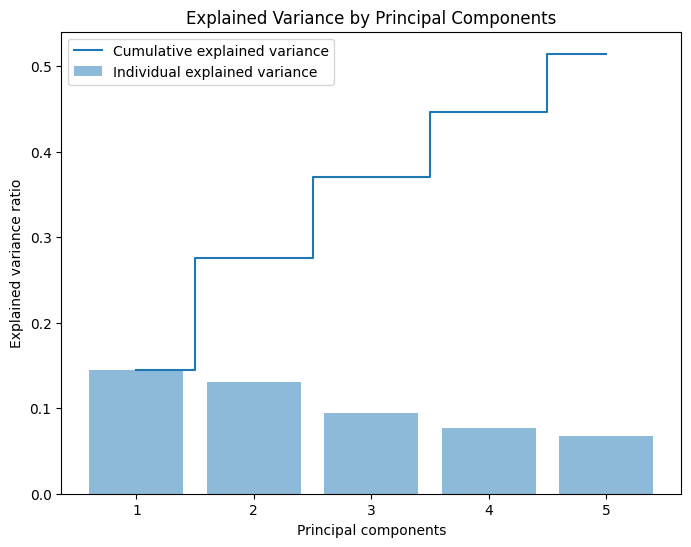

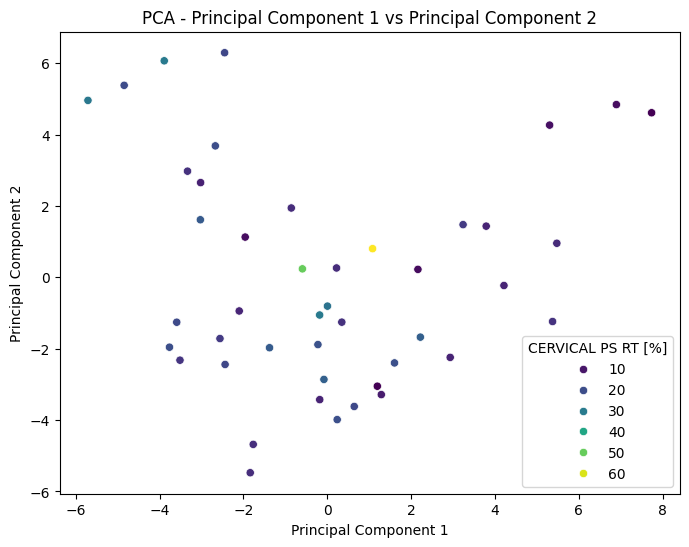

In [161]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=target, data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title=target)
plt.show()

Based on the explained variance, I would imagine that I would only need about 4-5 components to have 50% of the variance explained. 

Silhouette Score: 0.2815747917817861


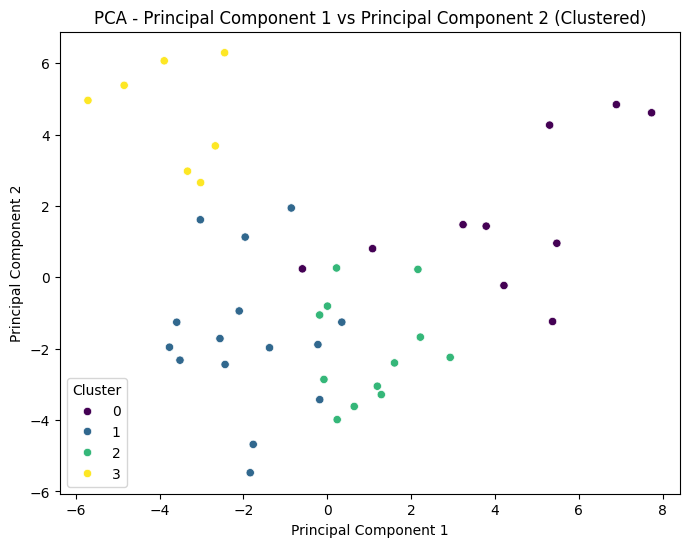

<Figure size 800x600 with 0 Axes>

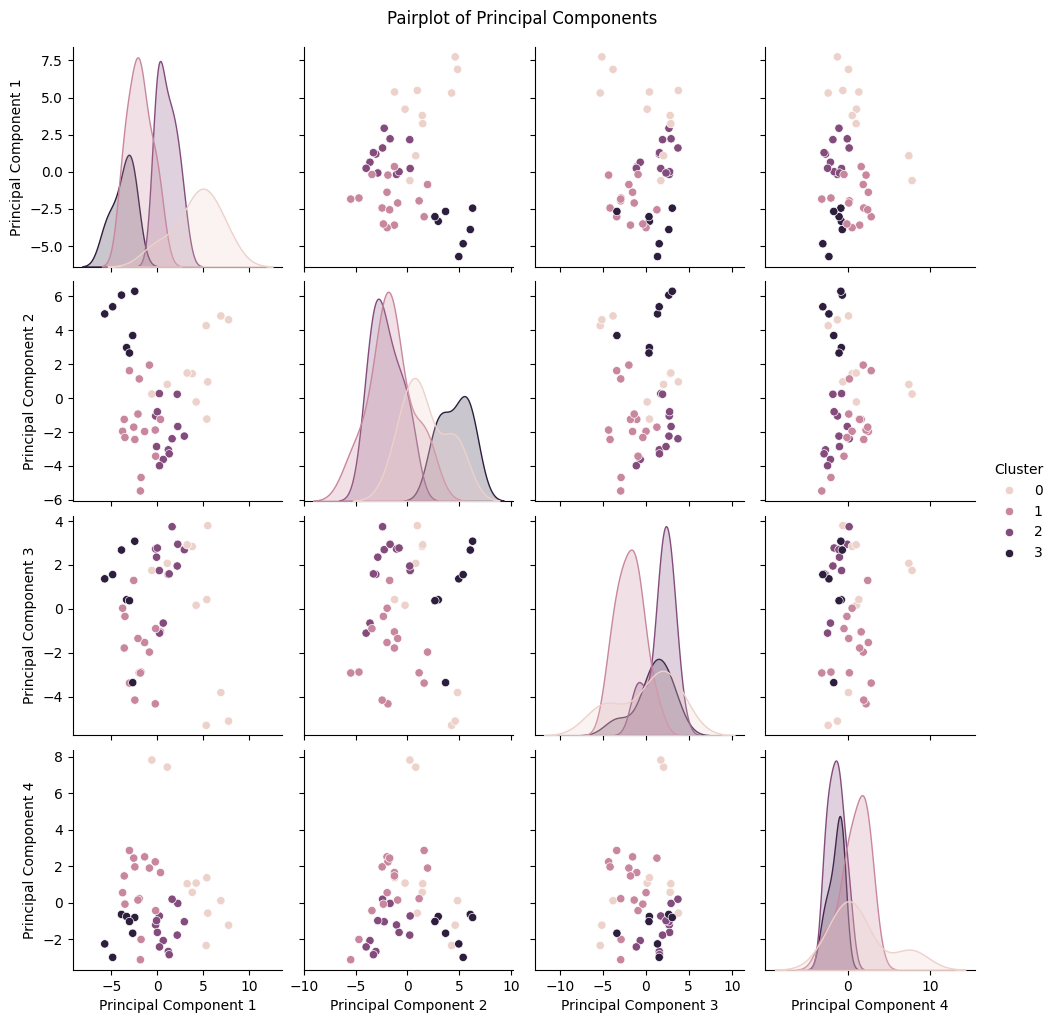

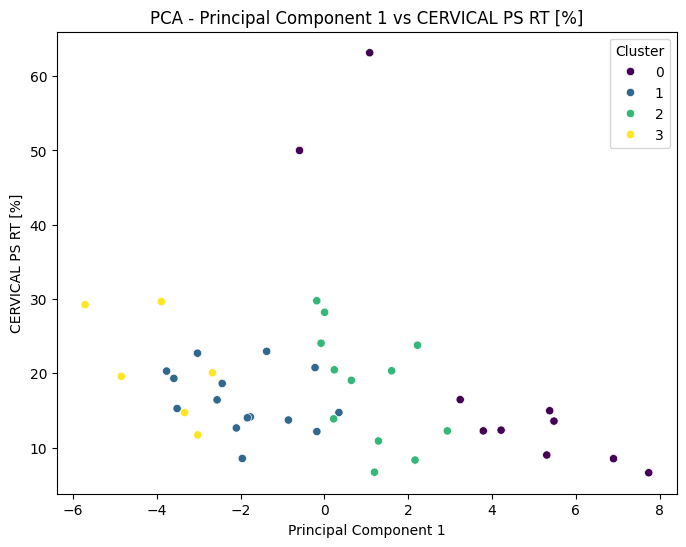

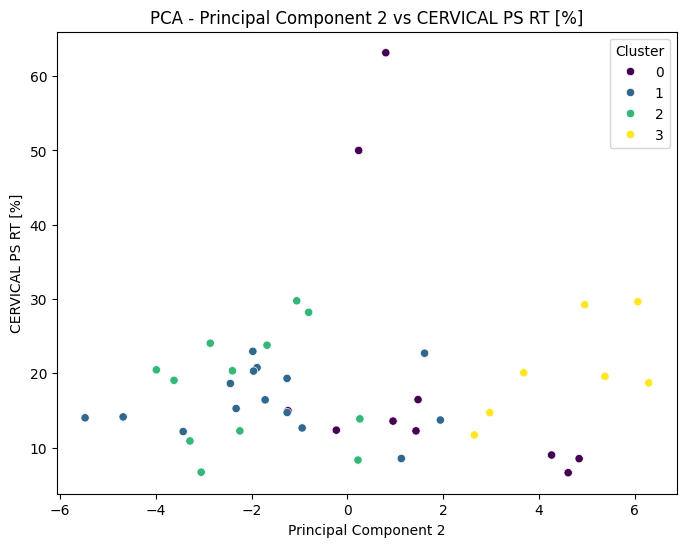

In [163]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Display the first few rows of the updated PCA DataFrame
pca_df.head()

# Calculate the silhouette score
silhouette_avg = silhouette_score(principal_components, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs Principal Component 2 (Clustered)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Plot the relationship between the principal components and the target variable
plt.figure(figsize=(8, 6))
sns.pairplot(pca_df, hue='Cluster', vars=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'])
plt.suptitle('Pairplot of Principal Components', y=1.02)
plt.show()

# Plot the relationship between the principal components and the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='CERVICAL PS RT [%]', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs CERVICAL PS RT [%]')
plt.xlabel('Principal Component 1')
plt.ylabel('CERVICAL PS RT [%]')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 2', y='CERVICAL PS RT [%]', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 2 vs CERVICAL PS RT [%]')
plt.xlabel('Principal Component 2')
plt.ylabel('CERVICAL PS RT [%]')
plt.legend(title='Cluster')
plt.show()

Overall, PCA analysis appeared to be ineffective as a method for any predictions or clustering. It doesn't appear to have those properties for this data.

# Logistic Regression Analysis:

In [165]:
# Initial EDA: Inspecting the target variable and checking for missing values
target = 'CERVICAL PS RT [%]'

# Check for missing values in the dataset
missing_summary = mean_complete.isnull().sum()

# Summary statistics for the target variable
target_stats = mean_complete[target].describe()

# Displaying missing value summary and target variable statistics
missing_summary_nonzero = missing_summary[missing_summary > 0]
target_stats, missing_summary_nonzero

(count    44.000000
 mean     18.506413
 std      10.454597
 min       6.611920
 25%      12.319300
 50%      15.838950
 75%      20.539375
 max      63.150200
 Name: CERVICAL PS RT [%], dtype: float64,
 Series([], dtype: int64))

In [166]:
from sklearn.model_selection import train_test_split

# Preparing the data for multiple linear regression
X = mean_complete.drop(columns=[target])  # Independent variables
y = mean_complete[target]  # Dependent variable

# Converting categorical variables to dummy variables (if present)
X = pd.get_dummies(X, drop_first=True)

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Convert the target variable to binary based on the median
y_binary = (y >= y.median()).astype(int)

# Splitting the original dataset into training and testing sets for logistic regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Fit a logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_log, y_train_log)

# Predict on test data
y_pred_log = log_model.predict(X_test_log)
y_pred_prob = log_model.predict_proba(X_test_log)[:, 1]

# Evaluate the logistic regression model
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
roc_auc = roc_auc_score(y_test_log, y_pred_prob)

classification_summary = classification_report(y_test_log, y_pred_log)

# Output the accuarcy, precision, recall, and ROC AUC score, and classification summary into a dataframe
logistic_regression_metrics = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'ROC AUC': [roc_auc]
})
logistic_regression_metrics

c:\Users\jrzem\OneDrive - Seton Hill University\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,ROC AUC
0,0.888889,1.0,0.8,0.85


In [168]:
# Output the classification summary
classification_summary

'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89         4\n           1       1.00      0.80      0.89         5\n\n    accuracy                           0.89         9\n   macro avg       0.90      0.90      0.89         9\nweighted avg       0.91      0.89      0.89         9\n'

This is by far the best model for the data. We had to set it into a binary version of the target data however. 

- Refinement Steps:
    - Feature Importance:
        - Identify the most influential features in the logistic regression model.
    - Hyperparameter Tuning:
        - Optimize hyperparameters like regularization strength (C) and solver type using grid search or randomized search.
    - Cross-Validation:
        - Evaluate the model's stability using k-fold cross-validation to get more robust metrics.
    - Residual Analysis:
        - Examine misclassified cases to identify potential patterns or issues.
    - Alternative Thresholding:
        - Adjust the decision threshold to optimize precision, recall, or a specific metric (e.g., F1 score).

In [169]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Feature importance analysis
feature_importance = np.abs(log_model.coef_[0])  # Absolute value of coefficients
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Hyperparameter tuning: Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Different solvers
    'penalty': ['l2']  # Using L2 regularization
}

# Grid search with cross-validation
log_reg_tuned = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
log_reg_tuned.fit(X_train_log, y_train_log)

# Best hyperparameters and cross-validated AUC score
best_params = log_reg_tuned.best_params_
best_auc = log_reg_tuned.best_score_

# Cross-validation scores for the tuned model
cv_scores = cross_val_score(
    log_reg_tuned.best_estimator_, X, y_binary, cv=5, scoring='roc_auc'
)

important_features.head(10), best_params, best_auc, cv_scores.mean(), cv_scores.std()

(                                              Feature  Importance
 42                                 CERVICAL PS LT [%]    0.446826
 46                                   LUMBAR ES RT [%]    0.407325
 48                                MIDDLE TRAP. RT [%]    0.276833
 2                             Participant Height (in)    0.269460
 43                                 UPPER TRAP. LT [%]    0.257393
 47                                MIDDLE TRAP. LT [%]    0.226411
 45                                   LUMBAR ES LT [%]    0.203530
 0                                                 Age    0.188437
 44                                 UPPER TRAP. RT [%]    0.180521
 1   How many years has the participant worked in t...    0.106417,
 {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
 np.float64(0.9333333333333333),
 np.float64(0.8600000000000001),
 np.float64(0.12409673645990855))

It is hard to come up with a few features that are most important for the model. All the features will have a large impact on the model generally. Furthermore, it is hard to predict the mean MVIC % that an individual will be in for the cervical Posterior Right.

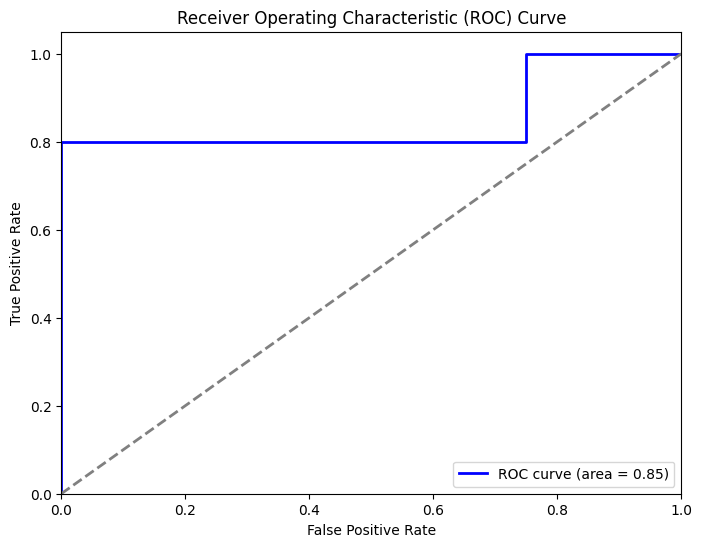

In [170]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

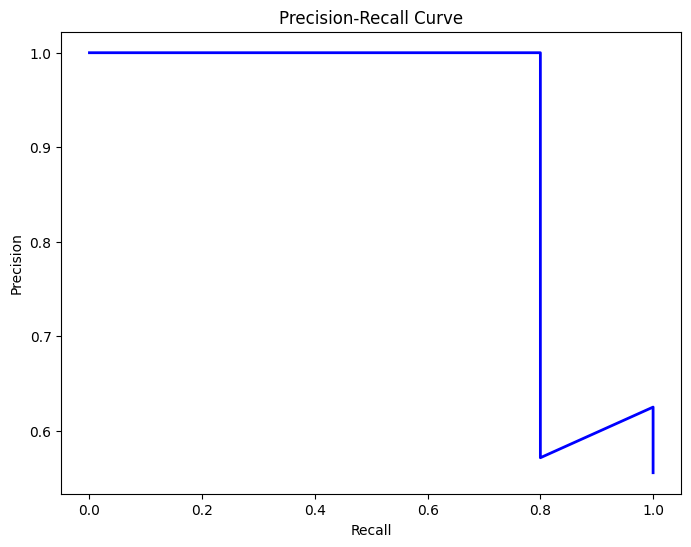

In [171]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test_log, y_pred_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### Focus on Certain Predictors:

In [173]:
# Look at a more reduced subset of the predictor variables
main_predictors = ['LUMBAR ES RT [%]','MIDDLE TRAP. RT [%]','Participant Height (in)',
                   'UPPER TRAP. LT [%]','MIDDLE TRAP. LT [%]','LUMBAR ES LT [%]',
                   'Age','UPPER TRAP. RT [%]'
]
# Use the same predicted value as before
predicted_value = 'CERVICAL PS RT [%]'

In [174]:
# Prepare the data
X = mean_complete[main_predictors]
y = (mean_complete[predicted_value] >= mean_complete[predicted_value].median()).astype(int)  # Convert to binary target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]

# Evaluate the logistic regression model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_summary = classification_report(y_test, y_pred)

# Output the evaluation metrics
logistic_regression_metrics = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'ROC AUC': [roc_auc]
})
print(logistic_regression_metrics)
print(classification_summary)

   Accuracy  Precision  Recall  ROC AUC
0  0.777778        1.0     0.6      0.8
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.60      0.75         5

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.78         9
weighted avg       0.85      0.78      0.77         9



Here the accuracy went down due to the reduced predictor variables; however, the accuracy is still relatively high. We can expect that given some of the predictor variables that we did use in the model. 

In [175]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Feature importance analysis
feature_importance = np.abs(log_model.coef_[0])  # Absolute value of coefficients
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Hyperparameter tuning: Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Different solvers
    'penalty': ['l2']  # Using L2 regularization
}

# Grid search with cross-validation
log_reg_tuned = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
log_reg_tuned.fit(X_train_log, y_train_log)

# Best hyperparameters and cross-validated AUC score
best_params = log_reg_tuned.best_params_
best_auc = log_reg_tuned.best_score_

# Cross-validation scores for the tuned model
cv_scores = cross_val_score(
    log_reg_tuned.best_estimator_, X, y_binary, cv=5, scoring='roc_auc'
)

important_features.head(10), best_params, best_auc, cv_scores.mean(), cv_scores.std()

(                   Feature  Importance
 1      MIDDLE TRAP. RT [%]    0.982211
 7       UPPER TRAP. RT [%]    0.822615
 0         LUMBAR ES RT [%]    0.769374
 6                      Age    0.673755
 5         LUMBAR ES LT [%]    0.377116
 3       UPPER TRAP. LT [%]    0.224805
 4      MIDDLE TRAP. LT [%]    0.072909
 2  Participant Height (in)    0.000070,
 {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
 np.float64(0.9333333333333333),
 np.float64(0.9175000000000001),
 np.float64(0.12134661099511597))

This helps us understand the best features of this model. Age seems to be a large factor in this model as well interstingly, as it is probably a good predictor of these values for some reason.

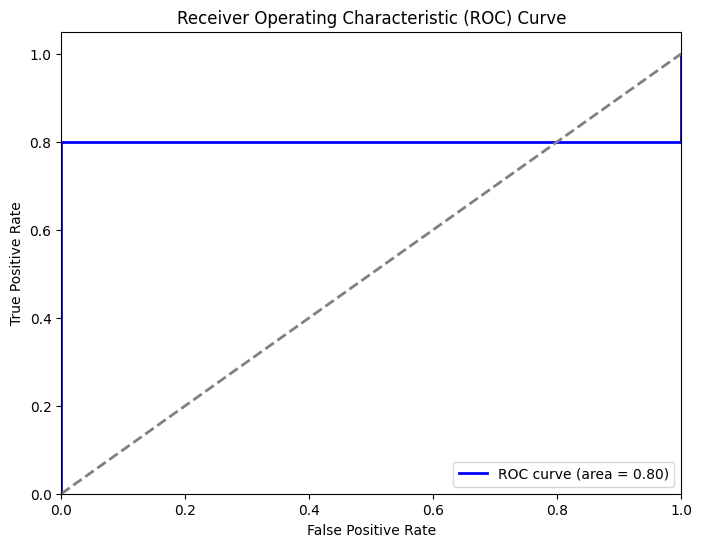

In [176]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

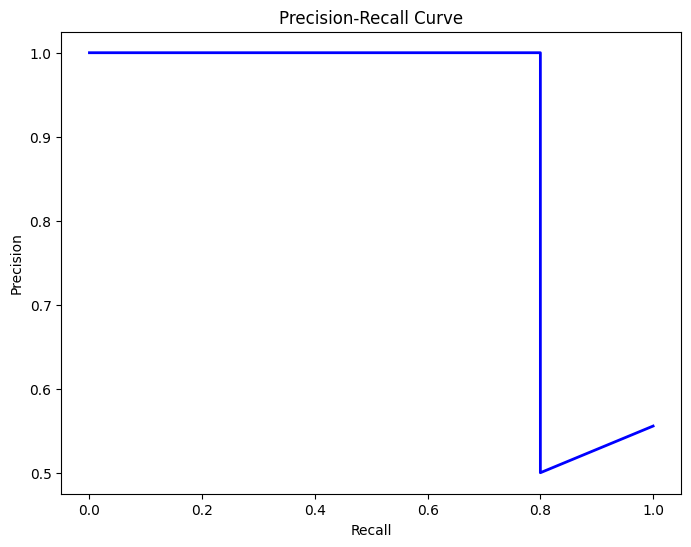

In [177]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test_log, y_pred_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Overall, there are some intersting indicators to use a logistic regression model, but it is always hard to reduce the predictors for a model. Furthermore, the predictors we found that worked best aren't that useful in the prediction of how high the mean MVIC is.